In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage.io import imread
from math import log10, sqrt,floor
import cv2
import math

# A

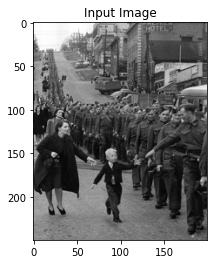

In [11]:
img = imread(r'C:\Users\fateme\Desktop\inputs\P2\wait_for_me_daddy_lr.png')
imgplot = plt.imshow(img,cmap="gray")
plt.title('Input Image')
plt.show()

In [12]:
img.shape

(250, 200)

In [13]:
#doublicate columns
for col in range(0,img.shape[1]):
   
    if col == 0:
       rescaled_img_col = img[:,col]
       rescaled_img_col = np.c_[ rescaled_img_col , img[:,col]] 
    else:
       rescaled_img_col = np.c_[ rescaled_img_col , img[:,col]] 
       rescaled_img_col = np.c_[ rescaled_img_col , img[:,col]] 


In [14]:
rescaled_img_col.shape

(250, 400)

In [15]:
rescaled_img_col

array([[245, 245, 245, ..., 102, 137, 137],
       [248, 248, 248, ...,  90, 122, 122],
       [250, 250, 250, ..., 112, 136, 136],
       ...,
       [152, 152, 150, ...,  91,  93,  93],
       [139, 139, 146, ..., 100, 101, 101],
       [147, 147, 148, ..., 102,  96,  96]], dtype=uint8)

In [17]:
# doublicate rows
for row in range(0,img.shape[0]):
   
    if row == 0:
       rescaled_img = rescaled_img_col[row, :]
       rescaled_img = np.r_[ rescaled_img, rescaled_img_col[row, :]]  
    else:
       rescaled_img = np.r_[ rescaled_img, rescaled_img_col[row, :]] 
       rescaled_img = np.r_[ rescaled_img, rescaled_img_col[row, :]] 

In [18]:
rescaled_img_orginal = rescaled_img.reshape(500,400)

Text(0.5, 1.0, 'Result of rescale ')

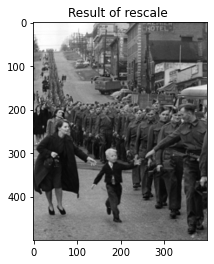

In [20]:
plt.imshow(rescaled_img_orginal,cmap="gray")
plt.title('Result of rescale ')# new sacle

In [22]:
rescaled_img_orginal.shape

(500, 400)

In [23]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [25]:
original = imread(r"C:\Users\fateme\Desktop\inputs\P2\wait_for_me_daddy_gt.png")
value = PSNR(original, rescaled_img_orginal)
print(f"PSNR value is {value} dB")

PSNR value is 30.909728869530287 dB


# B

In [26]:
def bilinear_interpolation(image, y, x):
    height = image.shape[0]
    width = image.shape[1]

    x1 = max(min(math.floor(x), width - 1), 0)
    y1 = max(min(math.floor(y), height - 1), 0)
    x2 = max(min(math.ceil(x), width - 1), 0)
    y2 = max(min(math.ceil(y), height - 1), 0)

    a = float(image[y1, x1])
    b = float(image[y2, x1])
    c = float(image[y1, x2])
    d = float(image[y2, x2])

    dx = x - x1
    dy = y - y1

    new_pixel = a * (1 - dx) * (1 - dy)
    new_pixel += b * dy * (1 - dx)
    new_pixel += c * dx * (1 - dy)
    new_pixel += d * dx * dy
    return round(new_pixel)


def resize(image, new_height, new_width):
    new_image = np.zeros((new_height, new_width), image.dtype) 

    orig_height = image.shape[0]
    orig_width = image.shape[1]

    # Compute center column and center row
    x_orig_center = (orig_width-1) / 2
    y_orig_center = (orig_height-1) / 2

    # Compute center of resized image
    x_scaled_center = (new_width-1) / 2
    y_scaled_center = (new_height-1) / 2

    # Compute the scale in both axes
    scale_x = orig_width / new_width;
    scale_y = orig_height / new_height;

    for y in range(new_height):
        for x in range(new_width):
            x_ = (x - x_scaled_center) * scale_x + x_orig_center
            y_ = (y - y_scaled_center) * scale_y + y_orig_center

            new_image[y, x] = bilinear_interpolation(image, y_, x_)

    return new_image

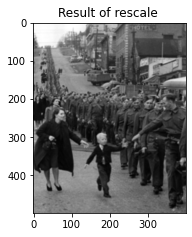

In [31]:
new_width = 400
new_height = 500

resized_img = resize(im, new_height, new_width)
plt.subplot(121)
imgplot = plt.imshow(resized_img,cmap="gray") 
plt.title('Result of rescale ')
plt.show()


In [28]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [30]:
original = imread(r"C:\Users\fateme\Desktop\inputs\P2\wait_for_me_daddy_gt.png")
value = PSNR(original, resized_img)
print(f"PSNR value is {value} dB")

PSNR value is 30.78672012597252 dB


# C

In [32]:
def euclidian_dist(a,b):
    return np.sqrt(((a[0]-b[0])**2)+((a[1]-b[1])**2))

In [33]:
def near_neighbour(X,P):

    i,j = X[0],X[1]
    A = [[i,j],[i,j+1],[i+1,j],[i+1,j+1]]
    dist = [euclidian_dist(A[0],P),euclidian_dist(A[1],P),euclidian_dist(A[2],P),euclidian_dist(A[3],P)]
    minpos = dist.index(min(dist))
    return A[minpos]        

In [34]:
def NN_interpolation(im,scale_factor):

    row, col = im.shape[0], im.shape[1]
    n_row,n_col = int(scale_factor * row),int(scale_factor * col)
    zoom = np.arange(n_row*n_col).reshape(n_row,n_col)
    print("zoom shape is: ",zoom.shape,"image shape is: ", im.shape,'\n')
    for i in range(n_row):
        for j in range(n_col):
            P = [floor(float(i)/scale_factor),floor(float(j)/scale_factor)]
            X = [int(i) for i in P]
            zoom[i][j] = im[near_neighbour(X,P)[0]][near_neighbour(X,P)[1]]
    return zoom

zoom shape is:  (500, 400) image shape is:  (250, 200) 



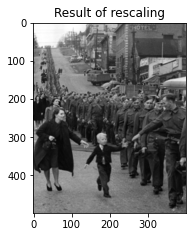

In [36]:
J = NN_interpolation(im,2)

plt.subplot(121)
imgplot = plt.imshow(J,cmap="gray") 
plt.title('Result of rescaling')
plt.show()


zoom shape is:  (500, 400) image shape is:  (250, 200) 



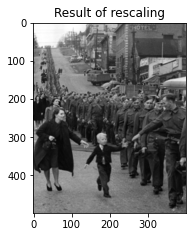

In [38]:
J = NN_interpolation(im,2)

plt.subplot(121)
imgplot = plt.imshow(J,cmap="gray") 
plt.title('Result of rescaling')
plt.show()


In [39]:
original = imread(r"C:\Users\fateme\Desktop\inputs\P2\wait_for_me_daddy_gt.png")
value = PSNR(original, J)
print(f"PSNR value is {value} dB")

PSNR value is 25.027313181900475 dB
